# ФР, плотность

# Задача 1

### Мультиномиальное (полиномиальное) распределение

Пусть при каждом испытании вероятности событий $A_1, A_2, \dots, A_m$ равны соответственно $\mathsf{p}_1, \mathsf{p}_2, \dots, \mathsf{p}_m$, причем
$$\sum_{i=1}^{m}\mathsf{p}_i = 1.$$

Тогда совместное распределение величин $X_1, X_2, \dots, X_m$, где $X_k$ — число наступлений события $A_k$ в серии из $n$ испытаний, задается вероятностями

$$
\mathsf{P}\left(X_1 = n_1, \dots, X_m = n_m, \right) = \frac{n!}{n_1!\dots n_m!}\mathsf{p}_1^{n_1}\dots \mathsf{p}_m^{n_m},
$$

где $n_1, n_2, \dots, n_m$ — произвольный набор целых неотрицательных чисел, таких что

$$\sum_{i=1}^m n_i = n.$$



**Пример:** подбрасываение шестигранного кубика $n$ раз. В этом случае событие $A_i$ — выпадение числа $i$, все вероятности $\mathsf{p}_i = \frac{1}{6}$, $X_i$ — число выпадений грани $i$ в результате $n$ экспериментов.

### Пример

В урне находится 5 красных шаров, 3 зеленых и 2 синих. Из урны вынимают наугад 5 шаров, каждый раз возвращая шар обратно. Найти вероятность получить ровно 2 красных, 2 зеленых и 1 синий шарик?

#### Решение

Пусть

*   $R$ — вытащен красный шар, $\mathsf{p}(R) = 0.5$
*   $G$ — вытащен зеленый шар, $\mathsf{p}(G) = 0.3$
*   $B$ — вытащен синий шар, $\mathsf{p}(B) = 0.2$

$X_i$, $i \in \{R,G,B\}$ — количество раз, когда вытащили шар $i$. Тогда
$$
\mathsf{P}(X_R=2, X_G=2, X_B = 1) = \frac{5!}{2!2!1!}0.5^2\cdot0.3^2\cdot 0.2 = 0.135
$$

### Кодинг

In [ ]:
import numpy as np
from tqdm.notebook import tqdm
import random
from math import factorial as fct

success = 0
n_experiments = 1000000
R = 5 # 0
G = 3 # 1
B = 2 # 2



# Function to pick n balls from the urn
def pick_balls(k):
  picked = []
  urn = [0]*R + [1]*G + [2]*B
  for i in range(k):
    idx = random.randint(0,len(urn)-1)
    picked.append(urn[idx])
  return picked

for _ in tqdm(range(n_experiments)):
  result = np.array(pick_balls(5))
  if len(result[result == 0]) == 2 and len(result[result == 1]) == 2 and len(result[result == 2]) == 1:
    success += 1

print('----------------------------------------------')
print('Найти вероятность получить ровно 2 красных, 2 зеленых и 1 синий шарик?')
print('Теоретическое значение', fct(5)/fct(2)/fct(2)/fct(1)*0.5**2*0.3**2*0.2)
print('Практическое значение', success / n_experiments)

  0%|          | 0/1000000 [00:00<?, ?it/s]

----------------------------------------------
Найти вероятность получить ровно 2 красных, 2 зеленых и 1 синий шарик?
Теоретическое значение 0.13499999999999998
Практическое значение 0.135017


# Задача 2

Три стрелка осуществляют по 1 выстрелу по мишени. Вероятности поразить мишень для каждого стрелка соответственно равны $p_1 = 0.6$, $p_2 = 0.7$, $p_3 = 0.8$. Выстрелы производятся независимо друг от друга. Составить функцию распределения случайной величины $\xi$, показывющей количество попаданий по мишени. Построить график.

### Решение

$$
F_{\xi}(x) = \begin{cases}
0, & x \leq 0, \\
0.024, & 0 < x\leq 1, \\
0.212, & 1 < x\leq 2, \\
0.664, & 2 < x\leq 3, \\
1, & x>3
\end{cases}
$$
Если стреляют трое, то случайная величина, соответствующая числу попаданий по мишени, может принимать значения $0,1,2,3$ (никто не попал, 1 попадание, 2 попадания или все трое выстрелили удачно). Найдем соответствующие вероятности:

$$
\mathsf{P}(\xi = 0) = (1-p_1)(1-p_2)(1-p_3) = 0.4\cdot0.3\cdot0.2 = 0.024,
$$

$$
\mathsf{P}(\xi = 1) = p_1(1-p_2)(1-p_3) + (1-p_1)p_2(1-p_3) + (1-p_1)(1-p_2)p_3=
$$

$$
= 0.6\cdot0.3\cdot0.2 + 0.4\cdot0.7\cdot0.2 + 0.4\cdot0.3\cdot0.8 = 0.188,
$$

$$
\mathsf{P}(\xi = 2) = (1-p_1)p_2\cdot p_3 + p_1(1-p_2)p_3 + p_1\cdot p_2(1-p_3)=
$$

$$
= 0.4\cdot0.7\cdot0.8 + 0.6\cdot0.3\cdot0.8 + 0.6\cdot0.7\cdot0.2 = 0.452,
$$

$$
  \mathsf{P}(\xi = 3) = p_1\cdot p_2\cdot p_3 = 0.6\cdot0.7\cdot0.8 = 0.336.
$$

Легко удостовериться, что:

$$
\sum_{i=0}^3 \mathsf{P}(\xi = i) = 0.024+0.188+0.452+0.336 = 1.
$$

# Задача 3

Журналисту необходимо взять интервью у одного из участников конференции по безопасности персональных данных. Вероятность того, что очередной участник конференции согласится на интервью, составляет $0.2$.

* Составить таблицу распределения для первых $5$ значений случайной величины — количества опрошенных человек до первого согласия.

* Определите вероятность получить согласие при опросе не более $3$ участников

### Решение

Поскольку запросы на интервью производятся до первого согласия, то условия задачи соответствуют геометрическому распределению и

$$
\mathsf{P}(\xi=k) = (1-p)^{k-1}p,
$$
где $p$ — вероятность успеха.

Ряд распределения случайной величины $\xi$, показывающей количество попыток до первого согласия, для первых $6$ значений будет иметь вид:

$$
\begin{array}{  c | c | c | c | c | c | c | c |  }
\xi & 1 & 2 & 3 & 4 & 5 & 6 & \ldots \\ \hline
\mathsf{P} & 0.2& 0.16& 0.128& 0.1024& 0.08192& 0.065536 & \ldots
\end{array}
$$

Для нахождения $\mathsf{P}(\xi \leq 3)$ необходимо сложить первые $3$ значения из таблицы распределения, откуда:
$$
\mathsf{P}(\xi \leq 3) = 0.488.
$$

# Задача 4

Случайная величина $\xi$ может принимать значения с ненулевой вероятностью только на отрезке $[0,\frac\pi4]$, при этом ее функция распределения на этом отрезке задается выражением $a\cdot \sin x$.

*   Найдите возможные значения $a$, напишите выражение для функции распределения. В полученном полуинтервале для $a$ выберете среднее значение параметра и найдите вероятность события $\xi=\frac\pi4$.
*   Выберите такое значение $a$, чтобы функция распределения была непрерывна. При этом значении $a$ вычислите вероятность события $\xi\in[0,\frac \pi 6]$.
*   В условиях непрерывности ФР запишите выражение для соответствующей функции плотности

### Решение

Так как функция распределения не убывает, то $a \geq 0$. Кроме того, $a \sin \frac{\pi}{4} \leq 1$, откуда $a \leq \sqrt{2}$. Итого, $a \in [0, \sqrt{2}]$.

Функция распределения при $a$ из указанного множества задается выражением
$$
F_\xi(x) = \begin{cases}
 0, & x \leq 0 \\
 a \cdot \sin x, & 0 < x \leq \frac{\pi}{4} \\
 1, & x > \frac{\pi}{4}
 \end{cases}.
$$

Среднее значение параметра $a$ равно $\frac{\sqrt{2}}{2}$, и тогда
$$
\mathsf P\left(\xi = \frac{\pi}{4}\right) = F_\xi\left(\frac{\pi}{4} + 0\right) - F_\xi\left(\frac{\pi}{4}\right) = 1 - \frac{\sqrt{2}}{2} \cdot \frac{\sqrt{2}}{2} = 0.5
$$

Функция распределения непрерывна при $a = \sqrt{2}$, при этом $a$
$$
\mathsf P\left(\xi \in \left[0, \frac{\pi}{6}\right]\right) = F_\xi\left(\frac{\pi}{6} \right) - F_\xi(0) = \sqrt{2}\left(\sin \frac{\pi}{6} - \sin 0\right) = \frac{\sqrt{2}}{2}.
$$

В условиях непрерывности ФР $f_{\xi}(x)=F^{\prime}_{\xi}(x)$. Для нашего случая имеем
$$
f_\xi(x) = \begin{cases}
 0, & x \notin [0, \frac{\pi}{4}] \\
 \sqrt{2} \cos x, & x \in [0, \frac{\pi}{4}]
 \end{cases}.
$$

### Кодинг

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import rv_continuous
from scipy.integrate import quad

# Параметры
a = np.sqrt(2)
x_max = np.pi / 4

# Определяем собственное непрерывное распределение
class CustomDist(rv_continuous):
    def _pdf(self, x):
        # f(x) = a * cos(x) на [0, pi/4]
        return np.where((x >= 0) & (x <= x_max), a * np.cos(x), 0.0)

    def _cdf(self, x):
        # F(x) = a * sin(x) на [0, pi/4]
        return np.where(x < 0, 0.0,
               np.where(x > x_max, 1.0, a * np.sin(x)))

# Создаём экземпляр распределения
custom_rv = CustomDist(a=0, b=x_max, name='custom_dist')

# Проверка: интеграл плотности должен быть 1
integral, _ = quad(custom_rv.pdf, 0, x_max)
print(f"Интеграл плотности на [0, pi/4]: {integral:.6f}")

# Теоретическая вероятность P(xi ∈ [0, pi/6])
x_target = np.pi / 6
theoretical_prob = custom_rv.cdf(x_target) - custom_rv.cdf(0)
print(f"Теоретическая вероятность P(ξ ∈ [0, π/6]): {theoretical_prob:.6f}")

Интеграл плотности на [0, pi/4]: 1.000000
Теоретическая вероятность P(ξ ∈ [0, π/6]): 0.707107


Эмпирическая вероятность (по выборке): 0.718000


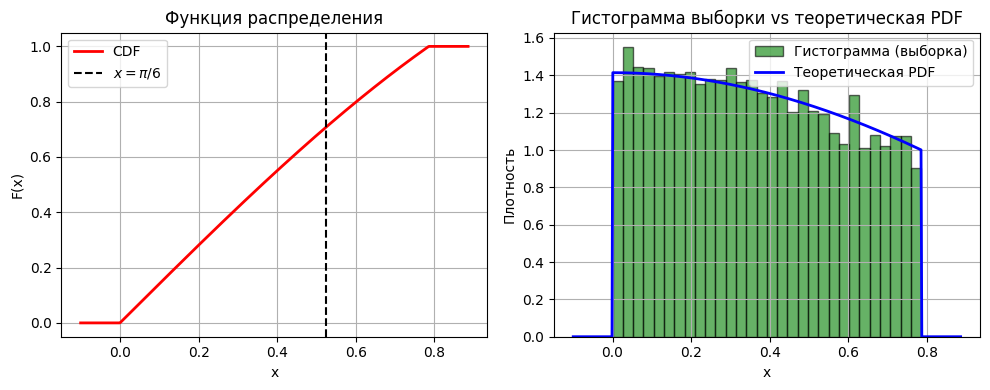

In [ ]:
# Генерация выборки
np.random.seed(42)
sample_size = 10000
sample = custom_rv.rvs(size=sample_size)

# Эмпирическая вероятность
empirical_prob = np.mean((sample >= 0) & (sample <= x_target))
print(f"Эмпирическая вероятность (по выборке): {empirical_prob:.6f}")

# Визуализация
x = np.linspace(-0.1, np.pi/4 + 0.1, 500)
plt.figure(figsize=(10, 4))

# CDF
plt.subplot(1, 2, 1)
plt.plot(x, custom_rv.cdf(x), 'r-', lw=2, label='CDF')
plt.axvline(x=np.pi/6, color='k', linestyle='--', label=r'$x = \pi/6$')
plt.title('Функция распределения')
plt.xlabel('x')
plt.ylabel('F(x)')
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(sample, bins=30, density=True, alpha=0.6, color='g', edgecolor='black', label='Гистограмма (выборка)')
plt.plot(x, custom_rv.pdf(x), 'b-', lw=2, label='Теоретическая PDF')
plt.title('Гистограмма выборки vs теоретическая PDF')
plt.xlabel('x')
plt.ylabel('Плотность')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

# Задача 5

Распределение абсолютно непрерывной случайной величины задано функцией плотности вероятности $f_{\xi}(x)$:

$$
     f_{\xi}(x) = \begin{cases}
  0, & x \notin (0, a]
   \\
   e^{3x}, & x \in (0, a]
\end{cases}
$$

* Найти неизвестный параметр $a>0$
* Составить функцию распределения $F_{\xi}(x)$ этой случайной величины


### Решение

Запишем функцию плотности несколько иначе:

$$
 f_{\xi}(x) = \begin{cases}
  0, & x \leq 0
   \\
   e^{3x}, & 0 < x\leq a
   \\
   0, & x > a
\end{cases}
$$

Найдем неизвестный параметр $a$. Так как случайная величина, по условию, абсолютно непрерывна, то $\int\limits_{-\infty}^{+\infty} f_{\xi}(t)dt = 1$. Учитывая, что $\int\limits_{-\infty}^{0}f_{\xi}(t)dt = \int\limits_{a}^{+\infty}f_{\xi}(t)dt = 0$, получим:  

$$
\int\limits_{-\infty}^{+\infty} f_{\xi}(t)dt = \int\limits_{0}^{a} e^{3t}dt = \frac{e^{3a}}{3} - \frac{1}{3} = 1,
$$

откуда  $e^{3a} = 4$, а значит $a = \frac{\ln{4}}{3}$. <br/>

Найдем вид функции распределения для каждого промежутка:<br/>
(a) Пусть $x\leq 0$, тогда:

$$
F_{\xi}(x) = \int\limits_{-\infty}^{x}f_{\xi}(t)dt = \int\limits_{-\infty}^{x}0dt = 0.
$$

(b) Пусть $0 < x\leq \frac{\ln4}{3}$, тогда:

$$
F_{\xi}(x) = \int\limits_{-\infty}^{0}f_{\xi}(t)dt + \int\limits_{0}^{x}f_{\xi}(t)dt = 0 + \int\limits_{0}^{x}e^{3t}dt =
$$

$$
\frac{1}{3}e^{3t}\bigg|_{0}^{x} = \frac{1}{3}e^{3x} - \frac{1}{3}.
$$

(c) Пусть $x>\frac{\ln4}{3}$, тогда:

$$
F_{\xi}(x) = \int\limits_{-\infty}^{0}f_{\xi}(t)dt + \int\limits_{0}^{\frac{\ln4}{3}}f_{\xi}(t)dt + \int\limits_{\frac{\ln4}{3}}^{x}f_{\xi}(t)dt
$$

$$
= 0 + \int\limits_{0}^{\frac{\ln4}{3}}e^{3t}dt + 0  = 1.
$$

  А значит функция распределения $F_{\xi}(x)$ может быть записана следующим образом:

$$
 F_{\xi}(x) = \begin{cases}
  0, & x \leq 0
   \\
   \frac{e^{3x}}{3} - \frac{1}{3}, & 0< x\leq \frac{\ln{4}}{3}
   \\
   1, & x > \frac{\ln4}{3}
\end{cases}
$$

# Задача 6 Независимость в совокупности (совместная независимость)

События $B_1, B_2, \dots B_n$ называются независимыми в совокупности, если для любых $1 \leq i_1 < i_2 < \dots < i_r \leq n$, $r = 2,3, \dots, n$,

$$
\mathsf{P}\left(\bigcap_{k=1}^{r} B_{i_{k}}\right) = \prod_{k=1}^r\mathsf{P}(B_{i_{k}})
$$

На плоскость бросается тетраэдр, три грани которого покрашены соответственно в красный, зеленый и синий цвета, а на четвертую нанесены все три цвета. Событие $R$ означает, что выпала грань, содержащая красный цвет, аналогично события $G$ и $B$. Проверьте  
* Являются ли рассматриваемые события попарно-независимыми
* Независимым в совокупности

### Решение

По условиям задачи есть 4 грани, каждый цвет встречается на двух из них, значит
$$
\mathsf{P}(R) = \mathsf{P}(G) = \mathsf{P}(B) = \frac{1}{2}.
$$

Проверим попарную независимость, например, для $R$ и $G$. Оба эти цвета встречаются лишь на одной грани из четыре, значит $\mathsf{P}(R \cap G) = \frac{1}{4}$. Тогда

$$
\mathsf{P}(R \cap G) = \mathsf{P}(R) \cdot  \mathsf{P}(G) = \frac{1}{4}.
$$

Аналогично для оставшихся пар, значит события **попарно-независимы**.

При этом

$$
\mathsf{P}(R \cap G \cap B) = \frac{1}{4} \neq \mathsf{P}(G) \cdot \mathsf{P}(B) \cdot \mathsf{P}(B) = \frac{1}{8},
$$

значит рассматриваемые события **независимыми в совокупности не являются**.

# Задача 7

Пусть $X_1, \ldots, X_n$ -- независимые и одинаково распределенные случайные величины. Вычислить функцию распределения
* $\xi_1 = \max(X_1, \ldots, X_n)$
* $\xi_2 = \min(X_1, \ldots, X_n)$

### Решение

По определению $F_{\xi}(x) = \mathsf{P}(\xi < x)$, тогда

$$
F_{\xi_1}(x) = \mathsf{P}(\max(X_1, \ldots, X_n) < x).
$$

Это выполняется в случае, когда все $X_i < x, i\in \{1,\dots, n\}$, откуда, с учетом независимости случайных величин и того, что они одинаково распределены, получаем

$$
F_{\xi_1}(x) = \mathsf{P}(X_1 < x, \dots, X_n < x) = F_{X_1}^n(x).
$$

Аналогично

$$
F_{\xi_2}(x) = \mathsf{P}(\min(X_1, \ldots, X_n) < x).
$$

Это условие выполняется, когда хотя бы одна случайная величина $X_i < x, i\in \{1,\dots, n\}:$

$$
F_{\xi_2}(x) = 1 - \mathsf{P}(X_1 \geq x, \dots, X_n \geq x).
$$

Используя независимость, и то, что все $X_i$ распределены одинаково, получаем

$$
\mathsf{P}(X_1 \geq x, \dots, X_n \geq x) =
$$

$$
=(1 - \mathsf{P}(X_1<x))\cdot \dots \cdot (1 - \mathsf{P}(X_n<x)) = (1 - F_{X_1}(x))^n.
$$

Откуда

$$
F_{\xi_2}(x) = 1 - (1 - F_{X_1}(x))^n
$$

# Задача 8 (Еще немного абсолютно-непрерывных распределений)

Как вообще задавать случайные величины с абсолютно непрерывным распределением? В целом, с любой неотрицательной со сходящимся интегралом функцией можно состряпать распределение.

Если
$$
f_{\xi}(x) = \frac{x^{n-1}}{\Gamma(n)}e^{-x}, \quad x \geq 0,
$$
то перед нами **гамма-распределение**. Обобщают это распределение еще и так ($\Gamma(n, \theta)$)
$$
f_{\xi}(x) = \frac{x^{n-1}}{\theta^n\Gamma(n)}e^{-x/\theta}, \quad x \geq 0.
$$

Еще один важный тип — **бета-распределение**
$$
f_\xi(x) = \frac{x^{\alpha - 1}(1-x)^{\beta-1}}{B(\alpha, \beta)}, \quad x \in [0,1].
$$
Увидим, что оно является [сопряженным априорным распределением](https://ru.wikipedia.org/wiki/%D0%A1%D0%BE%D0%BF%D1%80%D1%8F%D0%B6%D1%91%D0%BD%D0%BD%D0%BE%D0%B5_%D0%B0%D0%BF%D1%80%D0%B8%D0%BE%D1%80%D0%BD%D0%BE%D0%B5_%D1%80%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5) для распределений Бернулли, геометричсекого и биномиального.

Если $\xi_1, \xi_2, \ldots, \xi_n \sim \mathsf N_{0, 1}$ и независимы в совокупности, то
$$
\xi_1^2 + \ldots +\xi_n^2 \sim \chi^2(n)
$$
— **распределение хи-квадрат** с $n$ степенями свободы. Плотность распределения может быть выписана явно:
$$
f_{\chi^2} = \frac{1}{2^{n/2}\Gamma(n/2)}x^{n/2-1}e^{-x/2}.
$$
Понятно, что распределение хи-квадрат -- это частный случай гамма-распределения. Действительно, это $\Gamma(n/2, 2)$.

t-распределение Стьюдента. Если $\xi_0, \xi_1, \xi_2, \ldots, \xi_n \sim \mathsf N_{0, 1}$ и независимы в совокупности, то
$$
\frac{\xi_0}{\sqrt{\frac{1}{n} \sum\limits_{i = 1}^n \xi_i^2}} \sim t(n)
$$
— распределение Стьюдента с $n$ степенями свободы. [Картинки](https://ru.wikipedia.org/wiki/%D0%A0%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5_%D0%A1%D1%82%D1%8C%D1%8E%D0%B4%D0%B5%D0%BD%D1%82%D0%B0)

# Задача 9 (Пример сингулярного распределения)

### Множество Кантора и его свойства

Из отрезка $C_0 = \left[0,1\right]$ удаляется средняя часть, то есть интервал $\left(\frac{1}{3}, \frac{2}{3}\right)$. Оставшееся множество обозначается $C_1$, оно состоит из двух отрезков $\Delta_0 = \left[0, \frac{1}{3}\right]$ и $\Delta_1 = \left[\frac{2}{3},1\right]$. Из каждого отрезка снова удаляется средняя треть, оставшееся множество обозначается $C_2$, а его элементы $\Delta_{00}, \Delta_{01}, \Delta_{10}, \Delta_{11}$, и так далее.

В результате получается последовательность замкнутых множеств $C_0 \supset C_1 \supset C_2 \supset \dots$.

Множество
$$
C = ⋂\limits_{i=0}^{\infty}C_i
$$

называется канторовым множеством.

Во-первых, длина построенного множества равна нулю. Действительно, на каждом этапе мы выкидываем множество длины
$$
\frac{2^{n-1}}{3^n},
$$
а значит суммарно мы выбрасываем
$$
\sum\limits_{n = 1}^\infty \frac{2^{n-1}}{3^n} = 1.
$$
В то же время, мощность построенного множества — континуум — система вложенных отрезков сходится к двоичной записи вещественного числа, и наоборот.

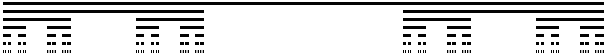

### Лестница Кантора

Канторова лестница — пример непрерывной монотонной функции $[0,1]\to[0,1]$, которая не является константой, но при этом имеет производную, равную нулю почти всюду на отрезке.

Она строится по индукции. В точках 0 и 1 функция принимает значения 0 и 1 соответственно. Далее интервал $(0,1)$ разбивается на равные части $\left(0,\dfrac 1 3\right),\left(\dfrac 13, \dfrac 23\right),\left(\dfrac 2 3, 1\right)$. На среднем сегменте полагаем $F(x)=\dfrac 12$. На оставшихся сегментах доопределяем функцию линейно. Далее, дробим $\left(0,\dfrac 1 3\right),\left(\dfrac 2 3, 1\right)$ на три части, на среднем сегменте кладем полусуммой, на оставшихся линейно, и так далее.

Получаем последовательность функций, причем
$$
|\varphi_n - \varphi_{n+k}| \leq \frac{1}{2^n}.
$$
Это влечет равномерную сходимость, а значит сходимость к непрерывной функции.

Untitled.avif